In [2]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples = 100, n_features = 2, n_informative = 1, n_redundant = 0,
                          n_classes = 2, n_clusters_per_class = 1, random_state = 41, hypercube = False, class_sep = 20)

In [3]:
import matplotlib.pyplot as plt

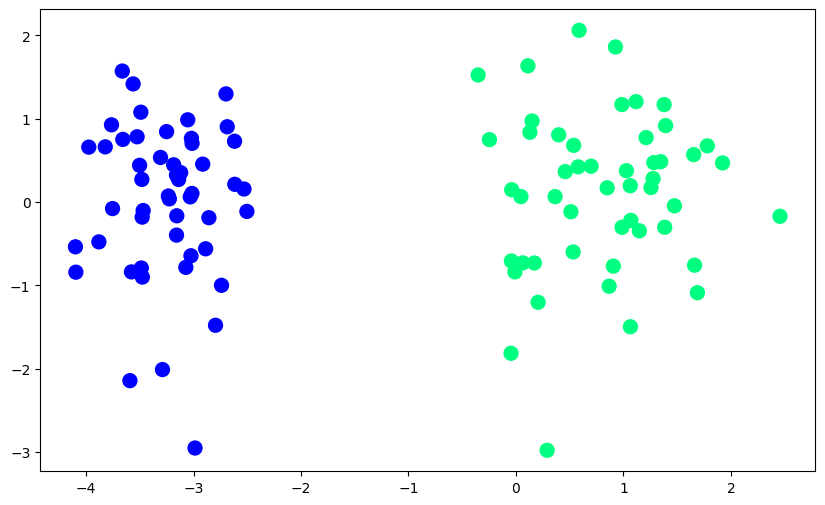

In [4]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,0], X[:, 1], c = y,cmap = 'winter', s = 100)

In [5]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty = 'none', solver = 'sag')
lor.fit(X,y)

C:\python3.7\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\python3.7\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [6]:
print(lor.coef_)
print(lor.intercept_)

[[4.8075993  0.21004358]]
[5.78213191]


In [10]:
m1 = -(lor.coef_[0][0] / lor.coef_[0][1])
b1 = -(lor.intercept_ / lor.coef_[0][1])

In [11]:
print(m1)
print(b1)

-22.88858062017324
[-27.52824935]


In [13]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [21]:
def gd(X,y):

    X = np.insert(X,0,1,axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(2500):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])


    return weights[1:], weights[0]

In [22]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [23]:
coef_1, intercept_1 = gd(X,y)

In [24]:
print(coef_1)
print(intercept_1)

[4.36410145 0.17189254]
5.1480294921597265


In [25]:
m = -(coef_1[0]/coef_1[1])
b = -(intercept_1/coef_1[1])

In [26]:
x_input1= np.linspace(-3,3, 100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

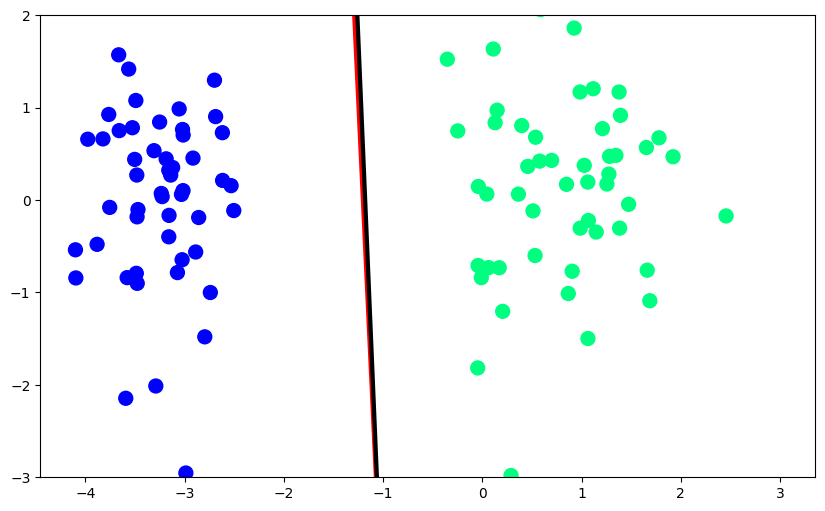

In [27]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.plot(x_input1, y_input1, color = 'black', linewidth = 3)
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'winter', s = 100)
plt.ylim(-3,2)